In [107]:
import pandas as pd
import numpy as np
import math as m
import datetime as dt
import matplotlib.pyplot as plt
import copy
from collections import Counter
import time
import seaborn as sns

In [2]:
table = pd.read_csv('1920_table.csv')
table.index = table.Squad
table = table[['MP','W','D','L','GF', 'GA','GDiff','Pts']]
table.columns = ['Played','W','D','L','GS','GA','GD','Points']
table = table.apply(pd.to_numeric)
table.head()

,Played,W,D,L,GS,GA,GD,Points
Squad,,,,,,,,
Liverpool,29,27,1,1,66,21,45,82
Manchester City,28,18,3,7,68,31,37,57
Leicester City,29,16,5,8,58,28,30,53
Chelsea,29,14,6,9,51,39,12,48
Manchester Utd,29,12,9,8,44,30,14,45


In [3]:
stats = pd.read_csv('1920_games.csv')
stats.Date = pd.to_datetime(stats.Date, format = '%d/%m/%Y')
postponed_idx = np.where(pd.isna(stats.xG_H) == True)[0]
played_idx = np.where(pd.isna(stats.xG_H) == False)[0]
played = stats.iloc[played_idx,:]
postponed = stats.iloc[postponed_idx,:]

In [4]:
stats.head()

,Wk,Day,Date,Time,Home,xG_H,Score,G_Home,G_Away,xG_A,Away,Attendance,Venue
0,1,Fri,2019-08-09,20:00 (15:00),Liverpool,1.8,4–1,4.0,1.0,1.0,Norwich City,53333.0,Anfield
1,1,Sat,2019-08-10,12:30 (07:30),West Ham,0.7,0–5,0.0,5.0,3.3,Manchester City,59870.0,London Stadium
2,1,Sat,2019-08-10,15:00 (10:00),Burnley,0.7,3–0,3.0,0.0,0.8,Southampton,19784.0,Turf Moor
3,1,Sat,2019-08-10,15:00 (10:00),Bournemouth,1.0,1–1,1.0,1.0,1.0,Sheffield Utd,10714.0,Vitality Stadium
4,1,Sat,2019-08-10,15:00 (10:00),Watford,0.9,0–3,0.0,3.0,0.7,Brighton,20245.0,Vicarage Road Stadium


In [5]:
postponed.head()

,Wk,Day,Date,Time,Home,xG_H,Score,G_Home,G_Away,xG_A,Away,Attendance,Venue
274,28,Sat,2020-02-29,15:00 (10:00),Aston Villa,NaN,NaN,NaN,NaN,NaN,Sheffield Utd,NaN,Villa Park
289,28,Wed,2020-03-11,19:30 (15:30),Manchester City,NaN,NaN,NaN,NaN,NaN,Arsenal,NaN,Etihad Stadium
290,30,Sat,2020-03-14,12:30 (08:30),Watford,NaN,NaN,NaN,NaN,NaN,Leicester City,NaN,Vicarage Road Stadium
291,30,Sat,2020-03-14,15:00 (11:00),Bournemouth,NaN,NaN,NaN,NaN,NaN,Crystal Palace,NaN,Vitality Stadium
292,30,Sat,2020-03-14,15:00 (11:00),Newcastle Utd,NaN,NaN,NaN,NaN,NaN,Sheffield Utd,NaN,St. James' Park


In [6]:
teams = pd.unique(played.Home)

In [7]:
#Winsorise Goals Scored - Maximum per Game at 5. Changes no Results - Outliers
idx = played[played.G_Home > 5].index
played.iloc[idx, 7] = 5

idx = played[played.G_Away > 5].index
played.iloc[idx, 8] = 5

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
## New Approach - Offensive and Defensive Strength ##

In [9]:
mean_home_scored = played.G_Home.mean()
mean_away_scored = played.G_Away.mean()
mean_home_conceded = played.G_Away.mean()
mean_away_conceded = played.G_Home.mean()

print('Mean Home Scored:', mean_home_scored)
print('Mean Away Scored:', mean_away_scored)

Mean Home Scored: 1.4965277777777777
Mean Away Scored: 1.1979166666666667


In [10]:
#Base Dictionaries
team_dict = {}
for team in teams:
    
    home_games = played[(played.Home == team)]
    num_home = len(home_games)
    home_scored_average = home_games['G_Home'].mean()
    home_conc_average = home_games['G_Away'].mean()
    
    away_games = played[(played.Away == team)]
    num_away = len(away_games)
    away_scored_average = away_games['G_Away'].mean()
    away_conc_average = away_games['G_Home'].mean()
    
    home_attacking = home_scored_average/mean_home_scored
    home_defending = home_conc_average/mean_away_scored
    away_attacking = away_scored_average/mean_away_scored
    away_defending = away_conc_average/mean_home_scored
    
    team_dict[team] = {'Home_Attack':home_attacking,
                      'Home_Defend':home_defending,
                      'Away_Attack':away_attacking,
                      'Away_Defend':away_defending}
    

In [11]:
team_dict['Arsenal']

{'Home_Attack': 1.1582366589327147,
 'Home_Defend': 1.1130434782608694,
 'Away_Attack': 0.8989966555183946,
 'Away_Defend': 0.8224165625557738}

In [12]:
#Arteta Took Over '20/12/2019'
#Only Updating Arsenal
arsenal_post_dict = {}

home_games = played[(played.Home == 'Arsenal')]
away_games = played[(played.Away == 'Arsenal')]
home_games = home_games[home_games.Date >= '20/12/2019']
away_games = away_games[away_games.Date >= '20/12/2019']
  
home_scored_average = home_games['G_Home'].mean()
home_conc_average = home_games['G_Away'].mean()
    
away_scored_average = away_games['G_Away'].mean()
away_conc_average = away_games['G_Home'].mean()
    
home_attacking = home_scored_average/mean_home_scored
home_defending = home_conc_average/mean_away_scored
away_attacking = away_scored_average/mean_away_scored
away_defending = away_conc_average/mean_home_scored
    
arsenal_post_dict = {'Home_Attack':home_attacking,
                      'Home_Defend':home_defending,
                      'Away_Attack':away_attacking,
                      'Away_Defend':away_defending}


In [13]:
arsenal_post_dict

{'Home_Attack': 1.3364269141531324,
 'Home_Defend': 0.6956521739130435,
 'Away_Attack': 0.6678260869565217,
 'Away_Defend': 0.534570765661253}

In [14]:
#Updates Simulation for New Dictionary
#If only Updating Arsenal
team_dict_arsenal_post = copy.deepcopy(team_dict)
team_dict_arsenal_post['Arsenal'] = arsenal_post_dict

In [15]:
#New Team Dict - Only Recent Games
team_dict_all_post = {}

played_sub = played[played.Date >= '20/12/2019']
mean_home_scored = played_sub.G_Home.mean()
mean_away_scored = played_sub.G_Away.mean()
mean_home_conceded = played_sub.G_Home.mean()
mean_away_conceded = played_sub.G_Away.mean()

for team in teams:
    
    home_games = played_sub[(played_sub.Home == team)]
    home_scored_average = home_games['G_Home'].mean()
    home_conc_average = home_games['G_Away'].mean()
    
    away_games = played_sub[(played_sub.Away == team)]
    away_scored_average = away_games['G_Away'].mean()
    away_conc_average = away_games['G_Home'].mean()
    
    home_attacking = home_scored_average/mean_home_scored
    home_defending = home_conc_average/mean_away_scored
    away_attacking = away_scored_average/mean_away_scored
    away_defending = away_conc_average/mean_home_scored
    
    team_dict_all_post[team] = {'Home_Attack':home_attacking,
                      'Home_Defend':home_defending,
                      'Away_Attack':away_attacking,
                      'Away_Defend':away_defending}

In [16]:
team_dict_all_post['Arsenal']

{'Home_Attack': 1.3563218390804597,
 'Home_Defend': 0.81267217630854,
 'Away_Attack': 0.7801652892561984,
 'Away_Defend': 0.542528735632184}

In [17]:
#New Team Dict - Mean and Variance - Draw from Distribution
team_dict_distribution = {}

#played_sub = played[played.Date >= '20/12/2019']
played_sub = played

mean_home_scored = played_sub.G_Home.mean()
mean_away_scored = played_sub.G_Away.mean()
mean_home_conceded = played_sub.G_Away.mean()
mean_away_conceded = played_sub.G_Home.mean()

team_dict_distribution['Average'] = {'Home_Attack':mean_home_scored,
                      'Home_Defend':mean_home_conceded,
                      'Away_Attack':mean_away_scored,
                      'Away_Defend':mean_away_conceded}

for team in teams:
    if team == 'Arsenal':
        played_sub = played[played.Date >= '20/12/2019']
    else:
        played_sub = played
    
    home_games = played_sub[(played_sub.Home == team)]
    home_scored_average = home_games['G_Home'].mean()
    home_scored_variance = home_games['G_Home'].var()
    
    home_conc_average = home_games['G_Away'].mean()
    home_conc_variance = home_games['G_Away'].var()
    
    away_games = played_sub[(played_sub.Away == team)]
    away_scored_average = away_games['G_Away'].mean()
    away_scored_variance = away_games['G_Away'].var()
    
    away_conc_average = away_games['G_Home'].mean()
    away_conc_variance = away_games['G_Home'].var()
    
    home_attacking = home_scored_average/mean_home_scored
    home_defending = home_conc_average/mean_away_scored
    away_attacking = away_scored_average/mean_away_scored
    away_defending = away_conc_average/mean_home_scored
    
    team_dict_distribution[team] = {'Home_Attack':(home_scored_average, home_scored_variance),
                      'Home_Defend':(home_conc_average, home_conc_variance),
                      'Away_Attack':(away_scored_average, away_scored_variance),
                      'Away_Defend':(away_conc_average, away_conc_variance)}

In [18]:
team_dict_distribution['Arsenal']

{'Home_Attack': (2.0, 1.6),
 'Home_Defend': (0.8333333333333334, 0.9666666666666666),
 'Away_Attack': (0.8, 0.7000000000000001),
 'Away_Defend': (0.8, 0.7000000000000001)}

In [131]:
#Base - All Teams From Start of Season
team_dict_distribution_base = {}

#played_sub = played[played.Date >= '20/12/2019']
played_sub = played

mean_home_scored = played_sub.G_Home.mean()
mean_away_scored = played_sub.G_Away.mean()
mean_home_conceded = played_sub.G_Away.mean()
mean_away_conceded = played_sub.G_Home.mean()

for team in teams: 
    home_games = played_sub[(played_sub.Home == team)]
    home_scored_average = home_games['G_Home'].mean()
    home_scored_variance = home_games['G_Home'].var()
    
    home_conc_average = home_games['G_Away'].mean()
    home_conc_variance = home_games['G_Away'].var()
    
    away_games = played_sub[(played_sub.Away == team)]
    away_scored_average = away_games['G_Away'].mean()
    away_scored_variance = away_games['G_Away'].var()
    
    away_conc_average = away_games['G_Home'].mean()
    away_conc_variance = away_games['G_Home'].var()
    
    home_attacking = home_scored_average/mean_home_scored
    home_defending = home_conc_average/mean_away_scored
    away_attacking = away_scored_average/mean_away_scored
    away_defending = away_conc_average/mean_home_scored
    
    team_dict_distribution_base[team] = {'Home_Attack':(home_scored_average, home_scored_variance),
                      'Home_Defend':(home_conc_average, home_conc_variance),
                      'Away_Attack':(away_scored_average, away_scored_variance),
                      'Away_Defend':(away_conc_average, away_conc_variance)}

In [23]:
# See Excel for Calculation
team_dict_distribution_new_player = copy.deepcopy(team_dict_distribution)
defensive_improvement = 0.5301

hdpp = team_dict_distribution_new_player['Arsenal']['Home_Defend'][0] / 5
var_h = team_dict_distribution_new_player['Arsenal']['Home_Defend'][1]

team_dict_distribution_new_player['Arsenal']['Home_Defend'] = (4*hdpp + defensive_improvement*hdpp, var_h)

adpp = team_dict_distribution_new_player['Arsenal']['Away_Defend'][0] / 5
var_a = team_dict_distribution_new_player['Arsenal']['Away_Defend'][1]
team_dict_distribution_new_player['Arsenal']['Away_Defend'] = (4*adpp + defensive_improvement*adpp, var_a)

In [25]:
def draw(dist_dict, team, metric):
    mean_val = dist_dict[team][metric][0]
    var_val = dist_dict[team][metric][1]
    num = 0.75*mean_val + 0.25*np.random.normal(mean_val, np.sqrt(var_val))
    return max(num, 0)

In [26]:
for i in range(10): print(draw(team_dict_distribution, 'Arsenal', 'Away_Attack'))

0.7523889032121527
0.8440256434596269
0.8125600026410664
0.8690781437532367
1.1296577583684118
0.8747311887432939
1.0218595755897733
0.826145194124643
0.6464943324795608
0.702929564024481


In [ ]:
#Home Goals = Home team attack strength * away team defence strength * average number of home goals
#Away Goals = Away team attack strength * home team defence strength * average number of away goals

#Draw from Poisson

In [27]:
#New Match Scores Function - Disitribution
def scores_draw(home_team, away_team, team_dict_distribution):
    home_team_attack = draw(team_dict_distribution, home_team, 'Home_Attack') / mean_home_scored
    home_team_defend = draw(team_dict_distribution, home_team, 'Home_Defend') / mean_home_conceded
    away_team_attack = draw(team_dict_distribution, away_team, 'Away_Attack') / mean_away_scored
    away_team_defend = draw(team_dict_distribution, away_team, 'Away_Defend') / mean_away_conceded
    
    #print('Home A/D:',home_team_attack, home_team_defend, '\n Away A/D:', away_team_attack, away_team_defend)
    
    home = home_team_attack * away_team_defend * mean_home_scored
    away = away_team_attack * home_team_defend * mean_away_scored
    
    home_sim = np.random.poisson(home)
    away_sim = np.random.poisson(away)
    
    return home_sim,away_sim

In [28]:
#Old Match Score Function
def scores(home_team, away_team, team_dict):
    home = team_dict[home_team]['Home_Attack'] * team_dict[away_team]['Away_Defend'] * mean_home_scored
    away = team_dict[away_team]['Away_Attack'] * team_dict[home_team]['Home_Defend'] * mean_away_scored
    
    home_sim = np.random.poisson(home)
    away_sim = np.random.poisson(away)
    
    return home_sim,away_sim

In [29]:
def league_table(results):
    #empty = np.zeros((20,8))
    #new_table = pd.DataFrame(empty, columns = ['Played','W','D','L','GS','GA','GD','Points'])
    #new_table.index = teams
    new_table = table.copy()
    
    
    for i in range(len(results)):
        game = results.iloc[i,:]
        if game.G_Home > game.G_Away:
            new_table.loc[game.Home, 'Played'] += 1
            new_table.loc[game.Home, 'W'] += 1
            new_table.loc[game.Home, 'GS'] += game.G_Home
            new_table.loc[game.Home, 'GA'] += game.G_Away
            new_table.loc[game.Home, 'GD'] += game.G_Home - game.G_Away
            new_table.loc[game.Home, 'Points'] += 3
        
            new_table.loc[game.Away, 'Played'] += 1
            new_table.loc[game.Away, 'L'] += 1
            new_table.loc[game.Away, 'GA'] += game.G_Home
            new_table.loc[game.Away, 'GS'] += game.G_Away
            new_table.loc[game.Away, 'GD'] += game.G_Away - game.G_Home
        
        elif game.G_Home < game.G_Away:
            new_table.loc[game.Away, 'Played'] += 1
            new_table.loc[game.Away, 'W'] += 1
            new_table.loc[game.Away, 'GS'] += game.G_Away
            new_table.loc[game.Away, 'GA'] += game.G_Home
            new_table.loc[game.Away, 'GD'] += game.G_Away - game.G_Home
            new_table.loc[game.Away, 'Points'] += 3
        
            new_table.loc[game.Home, 'Played'] += 1
            new_table.loc[game.Home, 'L'] += 1
            new_table.loc[game.Home, 'GS'] += game.G_Home
            new_table.loc[game.Home, 'GA'] += game.G_Away
            new_table.loc[game.Home, 'GD'] += game.G_Home - game.G_Away
        
        else:
            new_table.loc[game.Away, 'Played'] += 1
            new_table.loc[game.Away, 'D'] += 1
            new_table.loc[game.Away, 'GS'] += game.G_Away
            new_table.loc[game.Away, 'GA'] += game.G_Home
            new_table.loc[game.Away, 'GD'] += game.G_Away - game.G_Home
            new_table.loc[game.Away, 'Points'] += 1
        
            new_table.loc[game.Home, 'Played'] += 1
            new_table.loc[game.Home, 'D'] += 1
            new_table.loc[game.Home, 'GS'] += game.G_Home
            new_table.loc[game.Home, 'GA'] += game.G_Away
            new_table.loc[game.Home, 'GD'] += game.G_Home - game.G_Away
            new_table.loc[game.Home, 'Points'] += 1
    
    return new_table
    

In [30]:
def league_table_full(results):
    empty = np.zeros((20,8))
    new_table = pd.DataFrame(empty, columns = ['Played','W','D','L','GS','GA','GD','Points'])
    new_table.index = teams
    #new_table = table.copy()
    
    
    for i in range(len(results)):
        game = results.iloc[i,:]
        if game.G_Home > game.G_Away:
            new_table.loc[game.Home, 'Played'] += 1
            new_table.loc[game.Home, 'W'] += 1
            new_table.loc[game.Home, 'GS'] += game.G_Home
            new_table.loc[game.Home, 'GA'] += game.G_Away
            new_table.loc[game.Home, 'GD'] += game.G_Home - game.G_Away
            new_table.loc[game.Home, 'Points'] += 3
        
            new_table.loc[game.Away, 'Played'] += 1
            new_table.loc[game.Away, 'L'] += 1
            new_table.loc[game.Away, 'GA'] += game.G_Home
            new_table.loc[game.Away, 'GS'] += game.G_Away
            new_table.loc[game.Away, 'GD'] += game.G_Away - game.G_Home
        
        elif game.G_Home < game.G_Away:
            new_table.loc[game.Away, 'Played'] += 1
            new_table.loc[game.Away, 'W'] += 1
            new_table.loc[game.Away, 'GS'] += game.G_Away
            new_table.loc[game.Away, 'GA'] += game.G_Home
            new_table.loc[game.Away, 'GD'] += game.G_Away - game.G_Home
            new_table.loc[game.Away, 'Points'] += 3
        
            new_table.loc[game.Home, 'Played'] += 1
            new_table.loc[game.Home, 'L'] += 1
            new_table.loc[game.Home, 'GS'] += game.G_Home
            new_table.loc[game.Home, 'GA'] += game.G_Away
            new_table.loc[game.Home, 'GD'] += game.G_Home - game.G_Away
        
        else:
            new_table.loc[game.Away, 'Played'] += 1
            new_table.loc[game.Away, 'D'] += 1
            new_table.loc[game.Away, 'GS'] += game.G_Away
            new_table.loc[game.Away, 'GA'] += game.G_Home
            new_table.loc[game.Away, 'GD'] += game.G_Away - game.G_Home
            new_table.loc[game.Away, 'Points'] += 1
        
            new_table.loc[game.Home, 'Played'] += 1
            new_table.loc[game.Home, 'D'] += 1
            new_table.loc[game.Home, 'GS'] += game.G_Home
            new_table.loc[game.Home, 'GA'] += game.G_Away
            new_table.loc[game.Home, 'GD'] += game.G_Home - game.G_Away
            new_table.loc[game.Home, 'Points'] += 1
    
    return new_table
    

In [31]:
played_bare = played[['Home','G_Home','G_Away','Away']]
postponed_games = postponed[['Home','G_Home','G_Away','Away']]

def sim_league(passed_dict):
    n = len(postponed_games)
    for i in range(n):
        home_team = postponed_games.iloc[i,0]  
        away_team = postponed_games.iloc[i,3]
        home, away = scores(home_team, away_team, passed_dict)
        postponed_games.iloc[i,[1,2]] = [home, away]
    
    final_table = league_table(postponed_games)
    final_table = final_table.sort_values(by=['Points', 'GD'], ascending = False)
    pos = final_table.index.get_loc('Arsenal')
    return final_table, pos, final_table.iloc[pos, 7]


In [32]:
def sim_league_draw(passed_dict):
    n = len(postponed_games)
    for i in range(n):
        home_team = postponed_games.iloc[i,0]  
        away_team = postponed_games.iloc[i,3]
        home, away = scores_draw(home_team, away_team, passed_dict)
        postponed_games.iloc[i,[1,2]] = [home, away]
    
    final_table = league_table(postponed_games)
    final_table = final_table.sort_values(by=['Points', 'GD'], ascending = False)
    pos = final_table.index.get_loc('Arsenal')
    return final_table, pos, final_table.iloc[pos, 7]

In [76]:
def sim_league_full(games, passed_dict, team):
    n = len(games)
    for i in range(n):
        home_team = games.iloc[i,0]  
        away_team = games.iloc[i,3]
        home, away = scores_draw(home_team, away_team, passed_dict)
        games.iloc[i,[1,2]] = [home, away]
    
    final_table = league_table_full(games)
    final_table = final_table.sort_values(by=['Points', 'GD'], ascending = False)
    pos = final_table.index.get_loc(team)
    return final_table, pos, final_table.iloc[pos, 7]

In [ ]:
### Models Available ###

#1) Base Model, Full Season Data
#2) Base Model, Arsenal Updated to Post Emery
#3) Base Model, All Teams Post December

#4) Distribution Model, Full Season Data
#5) Distribution Model, Arsenal Updated

#6a) Full Season Model, Distribution, Full Season Data
#6b) Full Season Model, Basic, Full Season Data
#7a) Full Season model, Distribution, Arsenal Updated
#7b) Full Season model, Basic, Arsenal Updated

#8) Added Defender - Shift Distribution on Defensive Side
    # - How to Pick the Shift?
    
#Dictionaries Available
#team_dict, team_dict_arsenal_post, team_dict_all_post, team_dict_distribution, team_dict_distribution_new_player

In [35]:
n = 10
final_pos = []

start_tic = time.perf_counter()
for i in range(n):
    _, pos, pts = sim_league_draw(team_dict_distribution_new_player)
    final_pos.append((pos+1, pts))
    
end_tic = time.perf_counter()
print(f"Time for {n} Loops: {end_tic - start_tic:0.4f} seconds")

#1 Loop: 6.5 Seconds
#5 Loops: 32.5 Seconds
#10 Loops: 72.5 Seconds
#200 Loops: 1417 Seconds (20 minutes)

Time for 10 Loops: 46.2435 seconds


In [36]:
x,y = zip(*final_pos)

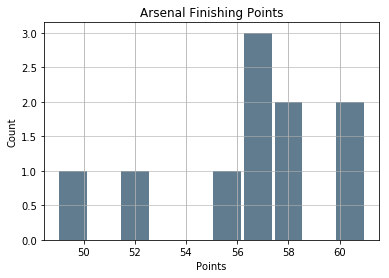

In [37]:
y = pd.Series(y)
y.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Arsenal Finishing Points')
plt.xlabel('Points')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)

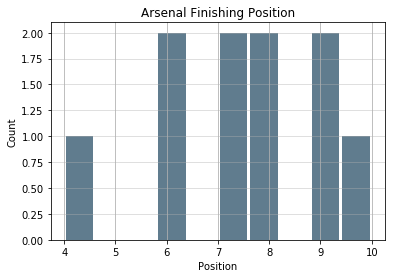

In [38]:
x = pd.Series(x)
x.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Arsenal Finishing Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)

In [39]:
Counter(x)

Counter({4: 1, 9: 2, 7: 2, 6: 2, 10: 1, 8: 2})

In [40]:
played_bare = played[['Home','G_Home','G_Away','Away']]
postponed_games = postponed[['Home','G_Home','G_Away','Away']]
all_games = pd.concat([played_bare,postponed_games])

In [132]:
n = 250
final_pos_2 = []

start_tic = time.perf_counter()
for i in range(n):
    _, pos, pts = sim_league_full(all_games, team_dict_distribution_base, 'Arsenal')
    final_pos_2.append((pos+1, pts))
    
end_tic = time.perf_counter()
print(f"Time for {n} Loops: {end_tic - start_tic:0.4f} seconds")

Time for 250 Loops: 318.5877 seconds


In [133]:
x,y = zip(*final_pos_2)

In [134]:
print('Mean Points:', np.mean(y))
print('Standard Deviation of Points:', np.sqrt(np.var(y)))

Mean Points: 54.976
Standard Deviation of Points: 7.945780263762647


In [135]:
finish_counter = Counter(x)
print('1st Place:', finish_counter[1])
print('4th or Better:', finish_counter[4] + finish_counter[3] + finish_counter[2] + finish_counter[1])
print('5th or Better:', finish_counter[4] + finish_counter[3] + finish_counter[2] + finish_counter[1] + finish_counter[5])

1st Place: 0
4th or Better: 19
5th or Better: 44


In [88]:
finish_counter

Counter({1: 192, 2: 41, 3: 12, 4: 4, 5: 1})

Text(0, 0.5, 'Proportion')

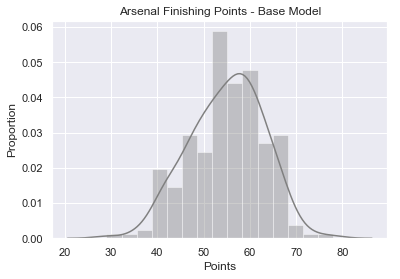

In [138]:
y = pd.Series(y)
sns.set()
sns.distplot(y, color='gray', bins = 15)
plt.title('Arsenal Finishing Points - Base Model')
plt.xlabel('Points')
plt.ylabel('Proportion')
#plt.grid(axis='y', alpha=0.5)

Text(0, 0.5, 'Count')

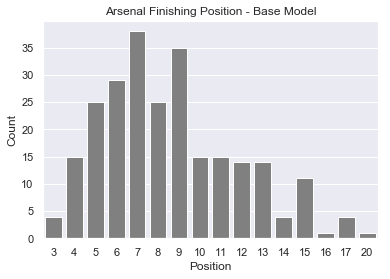

In [139]:
x = pd.Series(x, dtype = 'category')
sns.countplot(x, color='gray')
plt.title('Arsenal Finishing Position - Base Model')
plt.xlabel('Position')
plt.ylabel('Count')
#plt.grid(axis='y', alpha=0.5)